# Lab 2

Ganti constant `STATIC` menjadi path ke gambar-gambar yang akan digunakan dan `OUT` menjadi path ke output directory. Contoh jika gambar ada di directory yang sama dengan script ini, maka value nya menjadi `"."`. Library yang dibutuhkan untuk menjalankan script ini adalah sebagai berikut: `scikit-image`, `matplotlib`, `numpy`, `opencv`, dan `ipympl`. Cara menjalankan scriptnya sama seperti menjalankan notebook biasa.

In [1]:
import os
from pathlib import Path

SUB = "lab2"
BASE_DIR = Path(os.path.abspath("")).resolve(strict=True).parent
OUT = os.path.join(BASE_DIR, "out", SUB)
STATIC = os.path.join(BASE_DIR, "static", SUB)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage import color, filters, io, morphology, util

# %matplotlib widget

## COVID-19

In [3]:
covid = io.imread(os.path.join(STATIC, "virus.jpg"))
covid_r = covid[:, :, 0]
covid_g = covid[:, :, 1]
covid_b = covid[:, :, 2]

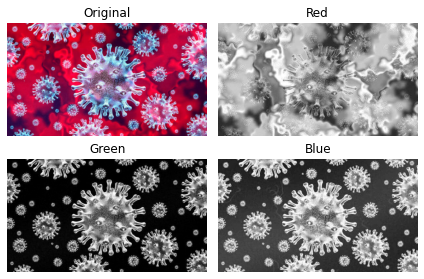

In [4]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.imshow(covid)
ax0.set_axis_off()
ax0.set_title("Original")
ax1.imshow(covid_r, cmap="gray")
ax1.set_axis_off()
ax1.set_title("Red")
ax2.imshow(covid_g, cmap="gray")
ax2.set_axis_off()
ax2.set_title("Green")
ax3.imshow(covid_b, cmap="gray")
ax3.set_axis_off()
ax3.set_title("Blue")
fig.tight_layout()
plt.show()

In [5]:
covid_c = 1 - util.img_as_float(covid_r)
covid_m = 1 - util.img_as_float(covid_g)
covid_y = 1 - util.img_as_float(covid_b)
covid_cmy = np.zeros(covid.shape)
covid_cmy[:, :, 0] = covid_c
covid_cmy[:, :, 1] = covid_m
covid_cmy[:, :, 2] = covid_y

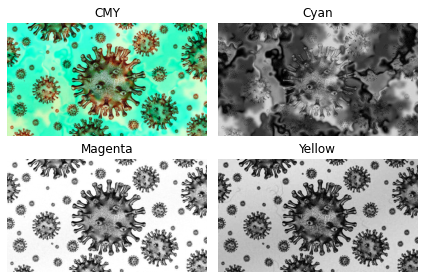

In [6]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.imshow(covid_cmy)
ax0.set_title("CMY")
ax0.set_axis_off()
ax1.imshow(covid_c, cmap="gray")
ax1.set_title("Cyan")
ax1.set_axis_off()
ax2.imshow(covid_m, cmap="gray")
ax2.set_title("Magenta")
ax2.set_axis_off()
ax3.imshow(covid_y, cmap="gray")
ax3.set_title("Yellow")
ax3.set_axis_off()
fig.tight_layout()
plt.show()

### Smoothing 4 Kernel

In [40]:
covid_c_mean_4 = filters.rank.mean(covid_c, selem=morphology.square(4))
covid_m_mean_4 = filters.rank.mean(covid_m, selem=morphology.square(4))
covid_y_mean_4 = filters.rank.mean(covid_y, selem=morphology.square(4))
covid_cmy_mean_4 = util.img_as_ubyte(np.zeros(covid.shape))
covid_cmy_mean_4[:, :, 0] = covid_c_mean_4
covid_cmy_mean_4[:, :, 1] = covid_m_mean_4
covid_cmy_mean_4[:, :, 2] = covid_y_mean_4

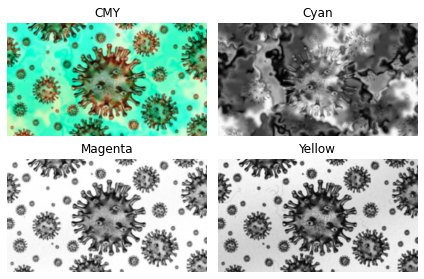

In [8]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.imshow(covid_cmy_mean_4)
ax0.set_title("CMY")
ax0.set_axis_off()
ax1.imshow(covid_c_mean_4, cmap="gray")
ax1.set_title("Cyan")
ax1.set_axis_off()
ax2.imshow(covid_m_mean_4, cmap="gray")
ax2.set_title("Magenta")
ax2.set_axis_off()
ax3.imshow(covid_y_mean_4, cmap="gray")
ax3.set_title("Yellow")
ax3.set_axis_off()
fig.tight_layout()
plt.show()

### Smoothing 9 Kernel

In [9]:
covid_c_mean_9 = filters.rank.mean(covid_c, selem=morphology.square(9))
covid_m_mean_9 = filters.rank.mean(covid_m, selem=morphology.square(9))
covid_y_mean_9 = filters.rank.mean(covid_y, selem=morphology.square(9))
covid_cmy_mean_9 = util.img_as_ubyte(np.zeros(covid.shape))
covid_cmy_mean_9[:, :, 0] = covid_c_mean_9
covid_cmy_mean_9[:, :, 1] = covid_m_mean_9
covid_cmy_mean_9[:, :, 2] = covid_y_mean_9

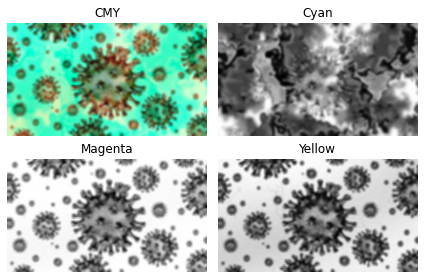

In [10]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.imshow(covid_cmy_mean_9)
ax0.set_title("CMY")
ax0.set_axis_off()
ax1.imshow(covid_c_mean_9, cmap="gray")
ax1.set_title("Cyan")
ax1.set_axis_off()
ax2.imshow(covid_m_mean_9, cmap="gray")
ax2.set_title("Magenta")
ax2.set_axis_off()
ax3.imshow(covid_y_mean_9, cmap="gray")
ax3.set_title("Yellow")
ax3.set_axis_off()
fig.tight_layout()
plt.show()

### Perbandingan

In [11]:
covid_r_mean_4 = 1 - util.img_as_float(covid_c_mean_4)
covid_g_mean_4 = 1 - util.img_as_float(covid_m_mean_4)
covid_b_mean_4 = 1 - util.img_as_float(covid_y_mean_4)
covid_rgb_mean_4 = np.zeros(covid.shape)
covid_rgb_mean_4[:, :, 0] = covid_r_mean_4
covid_rgb_mean_4[:, :, 1] = covid_g_mean_4
covid_rgb_mean_4[:, :, 2] = covid_b_mean_4

In [12]:
covid_r_mean_9 = 1 - util.img_as_float(covid_c_mean_9)
covid_g_mean_9 = 1 - util.img_as_float(covid_m_mean_9)
covid_b_mean_9 = 1 - util.img_as_float(covid_y_mean_9)
covid_rgb_mean_9 = np.zeros(covid.shape)
covid_rgb_mean_9[:, :, 0] = covid_r_mean_9
covid_rgb_mean_9[:, :, 1] = covid_g_mean_9
covid_rgb_mean_9[:, :, 2] = covid_b_mean_9

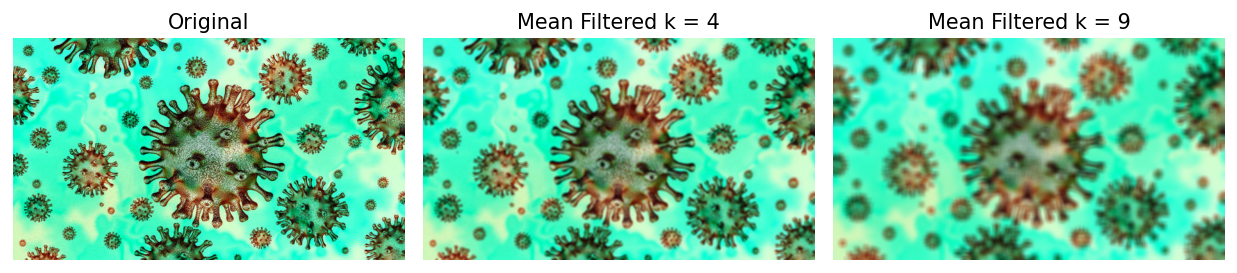

In [13]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 3), dpi=125)
ax0.imshow(covid_cmy)
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(covid_cmy_mean_4)
ax1.set_title("Mean Filtered k = 4")
ax1.set_axis_off()
ax2.imshow(covid_cmy_mean_9)
ax2.set_title("Mean Filtered k = 9")
ax2.set_axis_off()
fig.tight_layout()
plt.show()

Kita bisa lihat bahwa hasil smoothing nya terlihat jelas, terutama untuk kernel berukuran 9.

### K-Means Clustering

In [14]:
covid_cv2 = cv2.imread(os.path.join(STATIC, "virus.jpg"))
covid_cv2 = cv2.cvtColor(covid_cv2, cv2.COLOR_BGR2RGB)

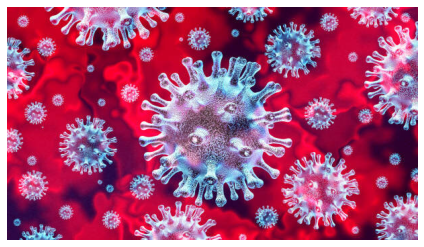

In [15]:
fig, ax0 = plt.subplots()
ax0.imshow(covid_cv2)
ax0.set_axis_off()
fig.tight_layout()
plt.show()

In [16]:
CRITERIA = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

covid_cv2_pixels = covid_cv2.reshape((-1, 3))
covid_cv2_pixels = np.float32(covid_cv2_pixels)

#### 4 Kernel

In [17]:
K = 4

_, labels_4, (centers_4) = cv2.kmeans(covid_cv2_pixels, K, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers_4 = np.uint8(centers_4)
labels_4 = labels_4.flatten()

covid_segmented_4 = centers_4[labels_4.flatten()]
covid_segmented_4 = covid_segmented_4.reshape(covid_cv2.shape)

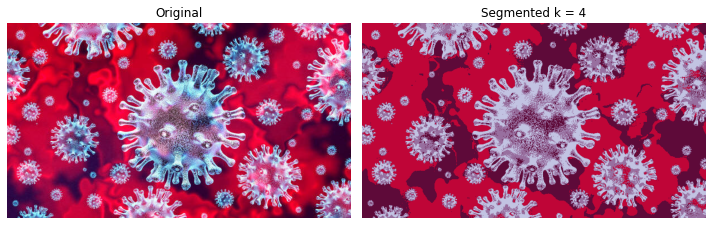

In [18]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.imshow(covid_cv2)
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(covid_segmented_4)
ax1.set_title("Segmented k = 4")
ax1.set_axis_off()
fig.tight_layout()
plt.show()

#### 9 Kernel

In [19]:
K = 9

_, labels_9, (centers_9) = cv2.kmeans(covid_cv2_pixels, K, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers_9 = np.uint8(centers_9)
labels_9 = labels_9.flatten()

covid_segmented_9 = centers_9[labels_9.flatten()]
covid_segmented_9 = covid_segmented_9.reshape(covid_cv2.shape)

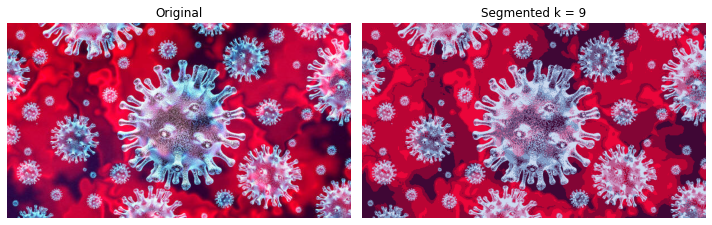

In [20]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.imshow(covid_cv2)
ax0.set_title("Original")
ax0.set_axis_off()
ax1.imshow(covid_segmented_9)
ax1.set_title("Segmented k = 9")
ax1.set_axis_off()
fig.tight_layout()
plt.show()

### Perbedaan

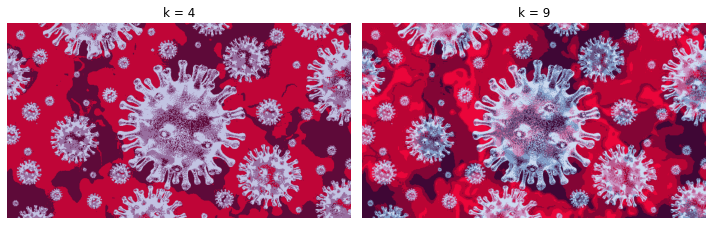

In [21]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.imshow(covid_segmented_4)
ax0.set_title("k = 4")
ax0.set_axis_off()
ax1.imshow(covid_segmented_9)
ax1.set_title("k = 9")
ax1.set_axis_off()
fig.tight_layout()
plt.show()

Kita bisa lihat perbandingan hasil segmentasi menggunakan k-means diatas. Gambar kiri dengan kernel size 4 menghasilkan gambar yang segmentasi nya terlihat jelas. Sedangkat gambar kanan dengan kernel sebesar 9 menghasilkan segmentasi yang tidak baik, terutama di bagian virus nya. Hal ini di karenakan besar kernel, besar kernel digunakan untuk menentukan ada berapa region atau class yang akan dihasilkan oleh k-means. Kita bisa lihat di gambar kiri ada empat total warna yaitu merah muda, merah tua, putih (silver?), dan abu-abu (?). Sedangkan di gambar kanan dengan kernel ukuran 9 mempunyai banyak warna yang shade nya mirip. Untuk tujuan segmentasi gambar, ukuran kernel yang rendah akan menghasilkan segmentasi yang lebih bagus.

## Bird

In [22]:
bird = io.imread(os.path.join(STATIC, "bird.jpg"))

In [23]:
bird_r = bird[:, :, 0]
bird_g = bird[:, :, 1]
bird_b = bird[:, :, 2]

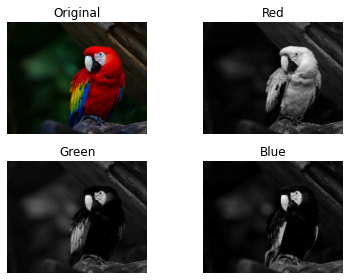

In [24]:
TITLE = ["Original", "Red", "Green", "Blue"]
IMAGES = [bird, bird_r, bird_g, bird_b]

fig, axs = plt.subplots(2, 2)
count = 0
for row in axs:
    for ax in row:
        ax.imshow(IMAGES[count], cmap="gray")
        ax.set_title(TITLE[count])
        ax.set_axis_off()
        count += 1
fig.tight_layout()
plt.show()

In [25]:
bird_hsv = color.rgb2hsv(bird)
bird_h = bird_hsv[:, :, 0]
bird_s = bird_hsv[:, :, 1]
bird_v = bird_hsv[:, :, 2]

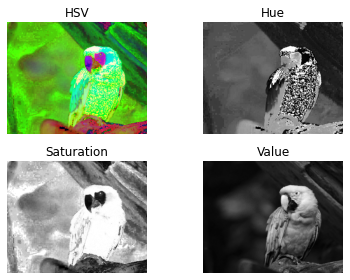

In [26]:
TITLE = ["HSV", "Hue", "Saturation", "Value"]
IMAGES = [bird_hsv, bird_h, bird_s, bird_v]

fig, axs = plt.subplots(2, 2)
count = 0
for row in axs:
    for ax in row:
        ax.imshow(IMAGES[count], cmap="gray")
        ax.set_title(TITLE[count])
        ax.set_axis_off()
        count += 1
fig.tight_layout()
plt.show()

In [27]:
def stretch_contrast(image):
    max_range = max(image.flatten())
    min_range = min(image.flatten())
    b = int(np.floor(255 / (max_range - min_range)))
    return (image - min_range) * b

### RGB Sharpening

In [28]:
bird_r_sharp = util.img_as_ubyte(filters.unsharp_mask(bird_r, radius=5, amount=2))
bird_g_sharp = util.img_as_ubyte(filters.unsharp_mask(bird_g, radius=5, amount=2))
bird_b_sharp = util.img_as_ubyte(filters.unsharp_mask(bird_b, radius=5, amount=2))
bird_sharp = util.img_as_ubyte(np.zeros(bird.shape))
bird_sharp[:, :, 0] = bird_r_sharp
bird_sharp[:, :, 1] = bird_g_sharp
bird_sharp[:, :, 2] = bird_b_sharp

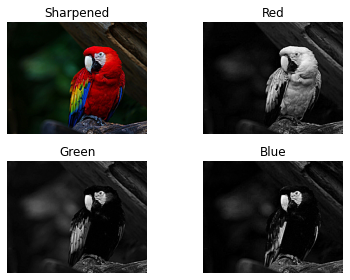

In [29]:
TITLE = ["Sharpened", "Red", "Green", "Blue"]
IMAGES = [bird_sharp, bird_r_sharp, bird_g_sharp, bird_b_sharp]

fig, axs = plt.subplots(2, 2)
count = 0
for row in axs:
    for ax in row:
        ax.imshow(IMAGES[count], cmap="gray")
        ax.set_title(TITLE[count])
        ax.set_axis_off()
        count += 1
fig.tight_layout()
plt.show()

### RGB Contrast Stretching

In [30]:
bird_r_stretch = stretch_contrast(bird_r)
bird_g_stretch = stretch_contrast(bird_g)
bird_b_stretch = stretch_contrast(bird_b)
bird_stretch = util.img_as_ubyte(np.zeros(bird.shape))
bird_stretch[:, :, 0] = bird_r_stretch
bird_stretch[:, :, 1] = bird_g_stretch
bird_stretch[:, :, 2] = bird_b_stretch

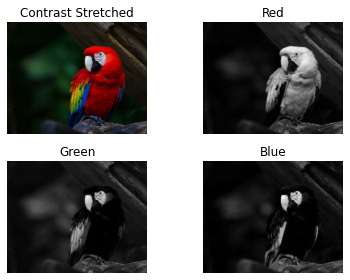

In [31]:
TITLE = ["Contrast Stretched", "Red", "Green", "Blue"]
IMAGES = [bird_stretch, bird_r_stretch, bird_g_stretch, bird_b_stretch]

fig, axs = plt.subplots(2, 2)
count = 0
for row in axs:
    for ax in row:
        ax.imshow(IMAGES[count], cmap="gray")
        ax.set_title(TITLE[count])
        ax.set_axis_off()
        count += 1
fig.tight_layout()
plt.show()

### HSV Sharpening

In [32]:
bird_v_sharp = filters.unsharp_mask(bird_v, radius=5, amount=2)
bird_hsv_sharp = np.zeros(bird_hsv.shape)
bird_hsv_sharp[:, :, 0] = bird_h
bird_hsv_sharp[:, :, 1] = bird_s
bird_hsv_sharp[:, :, 2] = bird_v_sharp
bird_rgb2hsv_sharp = color.hsv2rgb(bird_hsv_sharp)

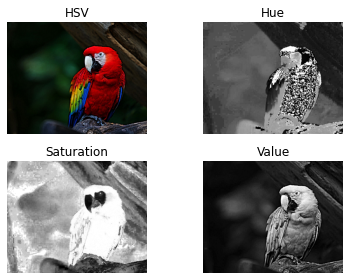

In [33]:
TITLE = ["HSV", "Hue", "Saturation", "Value"]
IMAGES = [bird_rgb2hsv_sharp, bird_h, bird_s, bird_v_sharp]

fig, axs = plt.subplots(2, 2)
count = 0
for row in axs:
    for ax in row:
        ax.imshow(IMAGES[count], cmap="gray")
        ax.set_title(TITLE[count])
        ax.set_axis_off()
        count += 1
fig.tight_layout()
plt.show()

### HSV Contrast Stretching

In [34]:
bird_v_stretch = util.img_as_float(stretch_contrast(util.img_as_ubyte(bird_v)))
bird_hsv_stretch = np.zeros(bird_hsv.shape)
bird_hsv_stretch[:, :, 0] = bird_h
bird_hsv_stretch[:, :, 1] = bird_s
bird_hsv_stretch[:, :, 2] = bird_v_stretch
bird_rgb2hsv_stretch = util.img_as_ubyte(color.hsv2rgb(bird_hsv_stretch))

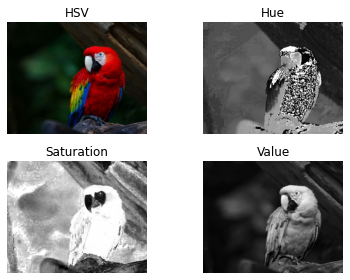

In [35]:
TITLE = ["HSV", "Hue", "Saturation", "Value"]
IMAGES = [bird_rgb2hsv_stretch, bird_h, bird_s, bird_v_stretch]

fig, axs = plt.subplots(2, 2)
count = 0
for row in axs:
    for ax in row:
        ax.imshow(IMAGES[count], cmap="gray")
        ax.set_title(TITLE[count])
        ax.set_axis_off()
        count += 1
fig.tight_layout()
plt.show()

### Analisa

In [36]:
bird_sharp_result_diff = util.compare_images(bird_sharp, bird_rgb2hsv_sharp)
bird_sharp_diff = util.compare_images(bird, bird_sharp)
bird_rgb2hsv_sharp_diff = util.compare_images(bird, bird_rgb2hsv_sharp)

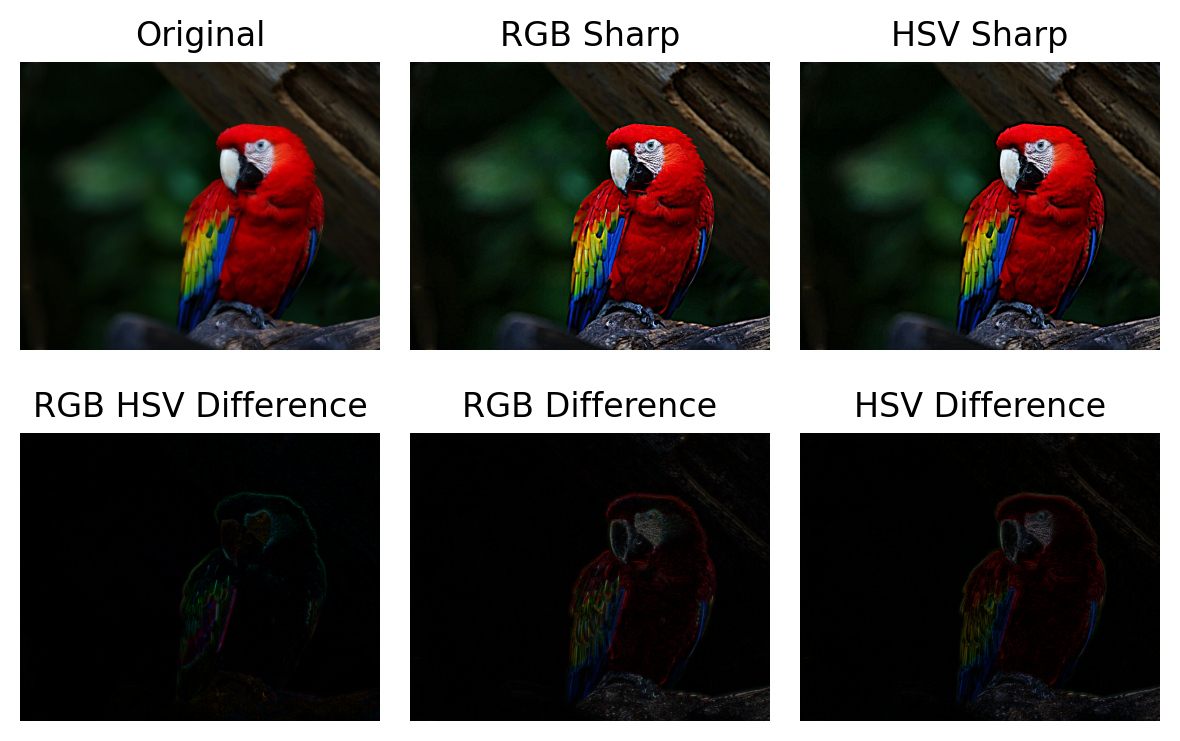

In [37]:
TITLE = ["Original", "RGB Sharp", "HSV Sharp", "RGB HSV Difference", "RGB Difference", "HSV Difference"]
IMAGES = [bird, bird_sharp, bird_rgb2hsv_sharp, bird_sharp_result_diff, bird_sharp_diff, bird_rgb2hsv_sharp_diff]

fig, axs = plt.subplots(2, 3, dpi=200)
count = 0
for row in axs:
    for ax in row:
        ax.imshow(IMAGES[count], cmap="gray")
        ax.set_title(TITLE[count])
        ax.set_axis_off()
        count += 1
fig.tight_layout()
plt.show()

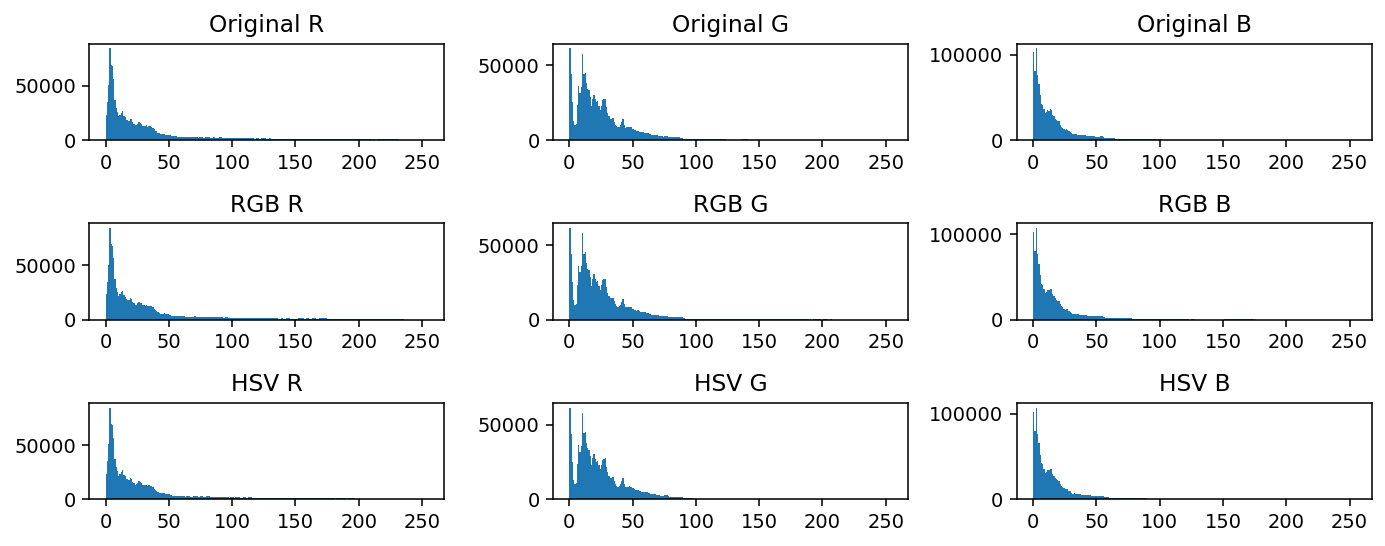

In [38]:
TITLE = [
    "Original R", "Original G", "Original B",
    "RGB R",      "RGB G",      "RGB B",
    "HSV R",      "HSV G",      "HSV B"
]
HIST = [
    bird_r.flatten(),                        bird_g.flatten(),                        bird_b.flatten(),
    bird_r_stretch.flatten(),                bird_g_stretch.flatten(),                bird_b_stretch.flatten(),
    bird_rgb2hsv_stretch[:, :, 0].flatten(), bird_rgb2hsv_stretch[:, :, 1].flatten(), bird_rgb2hsv_stretch[:, :, 2].flatten()
]

fig, axs = plt.subplots(3, 3, figsize=(10, 4), dpi=140)
count = 0
for row in axs:
    for ax in row:
        ax.hist(HIST[count], 256, range=(0, 255))
        ax.set_title(TITLE[count])
        count += 1
fig.tight_layout()
plt.show()

In [39]:
def print_min_max(title, image):
    print(f"{title}\nMin = {min(image.flatten())}     Max = {max(image.flatten())}\n")
print_min_max("Bird Red", bird_r)
print_min_max("Bird Green", bird_g)
print_min_max("Bird Blue", bird_b)
print_min_max("Bird Value", util.img_as_ubyte(bird_v))

Bird Red
Min = 0     Max = 255

Bird Green
Min = 0     Max = 253

Bird Blue
Min = 0     Max = 255

Bird Value
Min = 0     Max = 255



#### Sharpening

Kita bisa lihat hasil sharpening pada kedua color space bekerja dengan baik. Bisa dilihat pada dada burung dan pada kayu diatas burung, edges nya menjadi terlihat jelas dibanding gambar asli. Dilihat dari gambar diff, kita bisa lihat bahwa walaupun kedua channel menghasilkan edges yang bagus, hasil nya tidak sama. Ada sedikit perbedaan. Edges yang dibuat pada channel RGB di outline burung nya berwarna sedikit hijau, sedangkan pada channel HSV, outline burungnya berwarna hitam. Jika dilihat gambar perbedaan antara sharpening pada RGB dan HSV, kita bisa lihat bahwa majority difference nya pada warna hijau dan biru, dengan sedikit warna merah.

#### Contrast Stretching

Gambar burung asli sudah mempunyai contrast yang maksimal (channel green hanya kurang 2 dari maksimal). Sehingga, jika menggunakan contrast stretching, tidak akan mempunyai pengaruh apapun, mau di apply ke channel RGB atau HSV. Jika menggunakan histogram equalization, contrast nya akan bisa "diperbaiki" karena hotspot nya di area 0 sampai 50. Sekali lagi, semua ini karena intensitas tertinggi dan terendah untuk semua channel sudah maksimal/minimal sehingga contrast nya tidak berubah.